https://www.tensorflow.org/lite/tutorials/model_maker_object_detection#prerequisites

#ถ้า run ข้างล่างไม่ได้ ก็ run อันนี้ก่อน

!pip install -q tensorflow==2.5.0
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

In [2]:
import numpy as np
import os
import tensorflow as tf

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'dot']

In [3]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']

In [4]:
spec = model_spec.get('efficientdet_lite0')

In [5]:
spec.model_name

'efficientdet-lite0'

In [6]:
xml_path = 'C:\\Users\\wit_w\\OneDrive\\Desktop\\code\\Deep Learnig\\Recording Handwritten Digit\\TfLite\\dataset'

In [7]:
xml_path_test = 'C:\\Users\\wit_w\\OneDrive\\Desktop\\code\\Deep Learnig\\Recording Handwritten Digit\\TfLite\\dataset_test'

In [8]:
xml_path_val = 'C:\\Users\\wit_w\\OneDrive\\Desktop\\code\\Deep Learnig\\Recording Handwritten Digit\\TfLite\\dataset_val'

In [9]:
dataloader = object_detector.DataLoader.from_pascal_voc(xml_path, xml_path, labels)

INFO:tensorflow:Cache will be stored in C:\Users\wit_w\AppData\Local\Temp\tmp7k3m8490 with prefix filename f47ea991c744852930363a7212e2d8e4. Cache_prefix is C:\Users\wit_w\AppData\Local\Temp\tmp7k3m8490\f47ea991c744852930363a7212e2d8e4
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300
INFO:tensorflow:On image 400
INFO:tensorflow:On image 500


In [10]:
dataloader_test = object_detector.DataLoader.from_pascal_voc(xml_path_test, xml_path_test, labels)

INFO:tensorflow:Cache will be stored in C:\Users\wit_w\AppData\Local\Temp\tmpz9w2b5x4 with prefix filename a912ef79f12e325971524c789aac7847. Cache_prefix is C:\Users\wit_w\AppData\Local\Temp\tmpz9w2b5x4\a912ef79f12e325971524c789aac7847
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300


In [11]:
dataloader_val = object_detector.DataLoader.from_pascal_voc(xml_path_val, xml_path_val, labels)

INFO:tensorflow:Cache will be stored in C:\Users\wit_w\AppData\Local\Temp\tmpevhz285p with prefix filename d2b91b7504fd1efc6fc22ff9310596be. Cache_prefix is C:\Users\wit_w\AppData\Local\Temp\tmpevhz285p\d2b91b7504fd1efc6fc22ff9310596be
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300


In [12]:
model = object_detector.create(dataloader, model_spec=spec,validation_data = dataloader_test, epochs=1, batch_size=64, train_whole_model=True)

INFO:tensorflow:Retraining the models...
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


8/8 [==============================] - 390s 43s/step - det_loss: 1.8403 - cls_loss: 1.1521 - box_loss: 0.0138 - reg_l2_loss: 0.0647 - loss: 1.9050 - learning_rate: 0.0430 - gradient_norm: 0.9360 - val_det_loss: 1.6499 - val_cls_loss: 1.1287 - val_box_loss: 0.0104 - val_reg_l2_loss: 0.0647 - val_loss: 1.7145


In [13]:
model.evaluate(dataloader_val)

6/6 [==============================] - 79s 8s/step

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(33500, 7)
0/33500
DONE (t=0.15s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.74s).
Accumulating evaluation results...
DONE (t=0.67s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 

{'AP': 0.0008980269,
 'AP50': 0.005125777,
 'AP75': 2.923073e-05,
 'APs': 0.0013393159,
 'APm': 0.0053061326,
 'APl': -1.0,
 'ARmax1': 0.0040912344,
 'ARmax10': 0.029148404,
 'ARmax100': 0.030666221,
 'ARs': 0.015858188,
 'ARm': 0.061966114,
 'ARl': -1.0,
 'AP_/0': 0.0036063886,
 'AP_/1': 0.0017703843,
 'AP_/2': 6.4227046e-05,
 'AP_/3': 0.0005815344,
 'AP_/4': 0.0012031507,
 'AP_/5': 1.813178e-05,
 'AP_/6': 1.5398118e-06,
 'AP_/7': 2.2183618e-05,
 'AP_/8': 0.00035193536,
 'AP_/9': 0.0022588205,
 'AP_/.': 0.0}

In [ ]:
model.export(export_dir='./model')

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

image = np.array(Image.open('test_img.jpg').resize((320,320)))
plt.imshow(image)

(320, 320, 3)


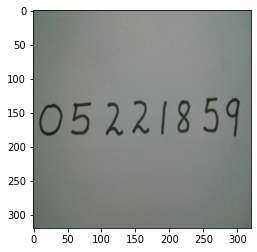

In [15]:
image = np.array(Image.open('test_img4.jpg').convert("RGB").resize((320,320)))
print(image.shape)
plt.imshow(image)

In [16]:
tflite_model_file = 'model/model.tflite'

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)

interpreter.resize_tensor_input()

In [18]:
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()

In [20]:
output_details = interpreter.get_output_details()

In [21]:
image.shape

(320, 320, 3)

In [22]:
interpreter.set_tensor(input_details[0]['index'], image.reshape(1, 320, 320, 3))

In [23]:
interpreter.invoke()

In [ ]:
output_details

In [24]:
detection_boxes = interpreter.get_tensor(output_details[0]['index'])
print(detection_boxes)

[[[ 0.43061545  0.02571651  0.585267    0.13701874]
  [ 0.4237566   0.17157707  0.5921259   0.26662868]
  [ 0.41031778  0.6552025   0.56877047  0.72797394]
  [ 0.39537758  0.7790921   0.57868135  0.864305  ]
  [ 0.4145377   0.32931134  0.5922614   0.41303363]
  [ 0.4086321   0.45097932  0.5779312   0.53269315]
  [ 0.40561703  0.57257164  0.5888521   0.62189734]
  [ 0.3967793   0.88209957  0.5892768   0.9575986 ]
  [ 0.45113587  0.64487755  0.53030276  0.73012245]
  [ 0.44675505  0.5631968   0.59218884  0.6079401 ]
  [ 0.4407931   0.75520396  0.5520536   0.8503269 ]
  [ 0.43772233  0.42058998  0.542469    0.521704  ]
  [ 0.37522164  0.01134992  0.5396753   0.13865009]
  [ 0.45296168  0.3064207   0.5629208   0.40631458]
  [ 0.40306643  0.19577537  0.5724291   0.31780243]
  [ 0.41533843  0.38318494  0.57472605  0.4886684 ]
  [ 0.40493736 -0.02130825  0.6236477   0.14818162]
  [ 0.4558022   0.85906756  0.5580362   0.95775604]
  [ 0.43616033  0.15932696  0.5277778   0.25918338]
  [ 0.423383

In [25]:
detection_classes = interpreter.get_tensor(output_details[1]['index'])
print(detection_classes)

[[0. 5. 8. 5. 2. 2. 1. 1. 0. 1. 2. 2. 0. 2. 2. 2. 0. 3. 2. 0. 2. 0. 3. 2.
  2.]]


In [26]:
detection_scores = interpreter.get_tensor(output_details[2]['index'])
print(detection_scores)

[[0.75390625 0.54296875 0.4375     0.421875   0.3515625  0.34375
  0.3359375  0.296875   0.125      0.12109375 0.12109375 0.11328125
  0.1015625  0.1015625  0.09375    0.09375    0.09375    0.0859375
  0.08203125 0.08203125 0.08203125 0.08203125 0.078125   0.078125
  0.07421875]]


In [27]:
num_boxes = interpreter.get_tensor(output_details[3]['index'])
print(num_boxes)

[25.]


In [ ]:
detection_boxes = interpreter.get_tensor(output_details[0]['index'])
detection_classes = interpreter.get_tensor(output_details[1]['index'])
detection_scores = interpreter.get_tensor(output_details[2]['index'])
num_boxes = interpreter.get_tensor(output_details[3]['index'])
for i in range(int(num_boxes[0])):
    if detection_scores[0, i] > .5:
        class_id = detection_classes[0, i]
        print(class_id)

In [28]:
import cv2

In [29]:
def draw_rect(image, box):
    h, w, c = image.shape
    y_min = int(max(1, (box[0] * h)))
    x_min = int(max(1, (box[1] * w)))
    y_max = int(min(h, (box[2] * h)))
    x_max = int(min(w, (box[3] * w)))

    # draw a rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 4)


In [30]:
detection_boxes[0, 0]

array([0.43061545, 0.02571651, 0.585267  , 0.13701874], dtype=float32)

[[0. 5. 8. 5. 2. 2. 1. 1. 0. 1. 2. 2. 0. 2. 2. 2. 0. 3. 2. 0. 2. 0. 3. 2.
  2.]]


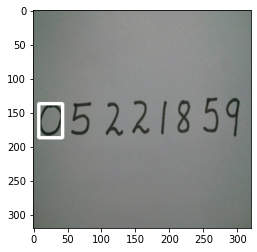

In [31]:
draw_rect(image, detection_boxes[0, 0])
print(detection_classes)
plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0, 1])
print(detection_classes)

plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0, 2])
print(detection_classes)

plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0, 3])
print(detection_classes)

plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0, 4])
print(detection_classes)

plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0, 5])
print(detection_classes)

plt.imshow(image)

In [ ]:
draw_rect(image, detection_boxes[0,11])
print(detection_classes)

plt.imshow(image)